# Composites simulation :  plastic plies

In [107]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from simmit import smartplus as sim
import os

dir = os.path.dirname(os.path.realpath('__file__'))

We need to import here the data, modify them if needed and proceed

In [108]:
umat_name = 'MIPLN' #This is the 5 character code for the periodic homogenization for multlayered composite
nstatev = 0 #The number of scalar variables required, everything is stored in sub-phases statevs

rho = 1.12 #The density of the material (overall)
c_p = 1.64 #The specific heat capacity (overall)

nphases = 2 #The number of phases
num_file = 0 #The num of the file that contains the subphases

psi_rve = 0.
theta_rve = 0.
phi_rve = 0.

props = np.array([nphases, num_file])

NPhases_file = dir + '/data/Nlayers0.dat'
NPhases = pd.read_csv(NPhases_file, delimiter=r'\s+', index_col=False, engine='python')
NPhases[::]


,Number,umat,save,c,psi_mat,theta_mat,phi_mat,psi_geom,theta_geom,phi_geom,nprops,nstatev,props
0,0,EPICP,1,0.5,0,0,0,0.0,0.0,0.0,6,8,31034
1,1,EPICP,1,0.5,0,0,0,0.0,0.0,0.0,6,8,3034


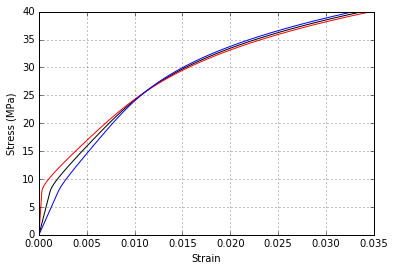

In [109]:

pathfile = dir + '/path.txt'
outputfile = dir + '/results_PLN.txt'
sim.solver(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, rho, c_p, pathfile, outputfile)

outputfile_macro = dir + '/results_PLN-0.txt'
outputfile_micro1 = dir + '/results_PLN-0-0.txt'
outputfile_micro2 = dir + '/results_PLN-0-1.txt'

fig = plt.figure()

e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_macro, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
plt.grid(True)
plt.plot(e11,s11, c='black')

e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_micro1, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
plt.grid(True)
plt.plot(e11,s11, c='red')

e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_micro2, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
plt.grid(True)
plt.plot(e11,s11, c='blue')

plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')


plt.show()


Quick verification, we will take the slope of the stress-strain curve and find out if it does correspond to E. For that one can take the last value of s11 and e11